## Test the pretrained machine learning models on mnist_test.csv dataset 
### To check whether it is predicted as actual digit from mnist test dataset using all five models

### Importing libraries

In [79]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt

### Importing mnist test data for visualization purpose

### Load MNIST data

In [80]:
from timeit import default_timer as timer
start = timer()
data = pd.read_csv('mnist_test.csv')
print(data.head())
print("Timer:- ", timer() - start)

   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      7    0    0    0    0    0    0    0    0    0  ...      0      0   
1      2    0    0    0    0    0    0    0    0    0  ...      0      0   
2      1    0    0    0    0    0    0    0    0    0  ...      0      0   
3      0    0    0    0    0    0    0    0    0    0  ...      0      0   
4      4    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]
Timer:-  1.0952771000011126


In [81]:
data.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.000000,10000.000000,10000.000000,10000.0000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,4.443400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.179300,0.163600,0.052600,0.0006,0.0,0.0,0.0,0.0,0.0,0.0
std,2.895865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.674149,5.736072,2.420004,0.0600,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,253.000000,156.000000,6.0000,0.0,0.0,0.0,0.0,0.0,0.0


### Let’s check how many images of each digit do we have in the dataset

In [82]:
order = list(np.sort(data['label'].unique()))
print(order)
num = []
for i in range (0,10):
    num.append(len(data[data['label']==i]))
d = {"Digits" : order, "Count" : num}
df = pd.DataFrame(data=d)
df

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


,Digits,Count
0,0,980
1,1,1135
2,2,1032
3,3,1010
4,4,982
5,5,892
6,6,958
7,7,1028
8,8,974
9,9,1009


### Visualizing the number of class ie digits and counts in the datasets


C:\Users\REAL\AppData\Local\Temp\ipykernel_6740\3026290635.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot( x='label', data=data, palette = 'winter')


Text(0.5, 1.0, 'Number of digit classes')

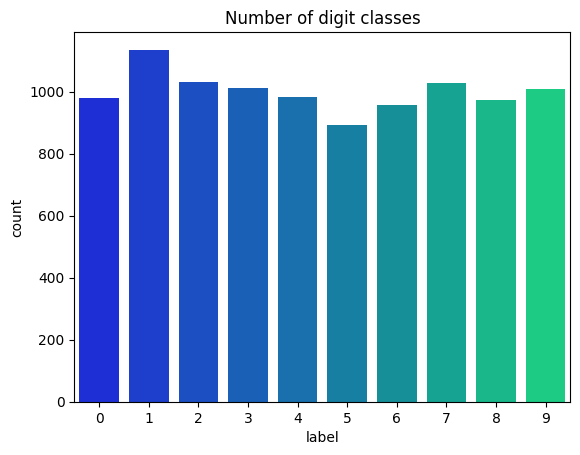

In [83]:
import seaborn as sns
plt.plot(figure = (16,10))
g = sns.countplot( x='label', data=data, palette = 'winter')
plt.title('Number of digit classes')

### Let’s see in which rows in the dataset do we have images of the digit “7”


In [84]:
data[data['label']==7].head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


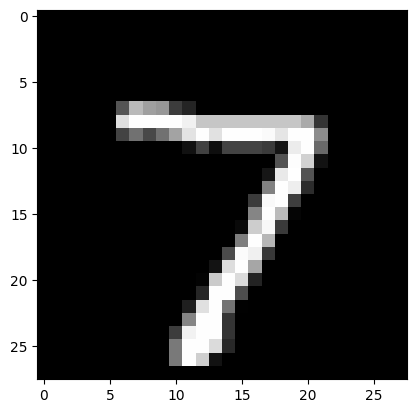

In [85]:
# Assuming you have already loaded the data into 'dataframe'
index_number = 0  # Replace with the index number you want to display
pic = data.iloc[index_number, 1:].values.reshape(28, 28)
plt.imshow(pic, cmap='gray')

### Load the Pre-trained Model: Load the pre-trained model that you saved after training your machine learning models.

In [86]:
from joblib import load
from timeit import default_timer as timer
start = timer()
# Load the pre-trained model
svm_model = load('svm_mnist_model.pkl')  
knn_model = load('k-nn_mnist_model.pkl')
lr_model = load('logistic_regression_mnist_model.pkl')
rfc_model = load('random_forest_mnist_model.pkl')
dtc_model = load('decision_tree_mnist_model.pkl')
print("Timer:- ", timer() - start)

Timer:-  0.6949497000005067


In [87]:
# Load the MNIST test data from CSV (assuming it's in 'mnist_test.csv')
from timeit import default_timer as timer
start = timer()
def load_mnist_test_data(filename):
    data = pd.read_csv(filename)
    X_test = data.iloc[:, 1:]  # Features (pixel values)
    y_test = data.iloc[:, 0]   # Labels (digits)
    return X_test, y_test
print("Timer:- ", timer() - start)

Timer:-  0.0002715999999054475


In [88]:
X_test, y_test = load_mnist_test_data('mnist_test.csv')

In [89]:
X_test = X_test/255.0

In [90]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_test = scale.fit_transform(X_test)

### Make Predictions: Use the loaded model to make predictions on the test data


In [91]:
from timeit import default_timer as timer
start = timer()
y_pred = svm_model.predict(X_test)
y_pred1 = knn_model.predict(X_test)
y_pred2 = lr_model.predict(X_test)
y_pred3 = rfc_model.predict(X_test)
y_pred4 = dtc_model.predict(X_test)
print('All five models predicted successfully')
print("Timer:- ", timer() - start)

All five models predicted successfully
Timer:-  162.5531755000011


### Display Actual and Predicted Results

In [102]:
import random

num_samples_to_display = 5  # Change this to the number of samples you want to display

# Check the length of the test data
num_test_samples = len(X_test)

if num_test_samples < num_samples_to_display:
    num_samples_to_display = num_test_samples

sample_indices_to_display = random.sample(range(num_test_samples), num_samples_to_display)


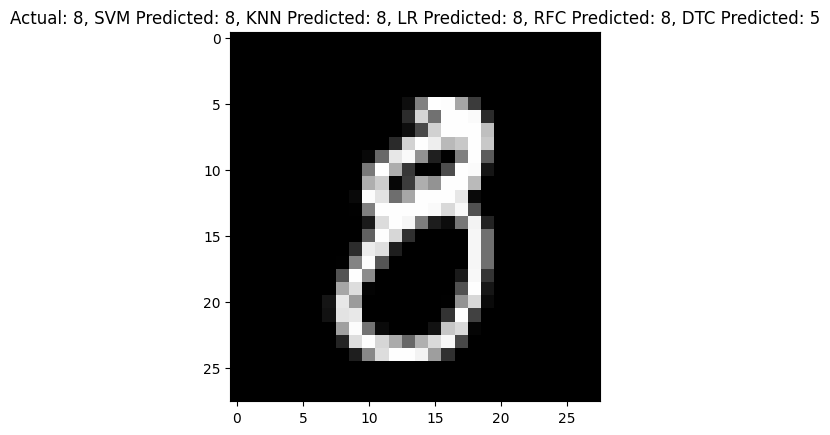

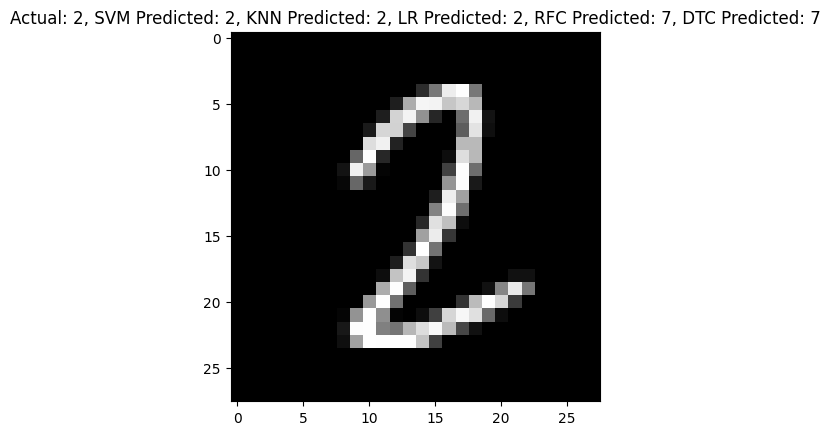

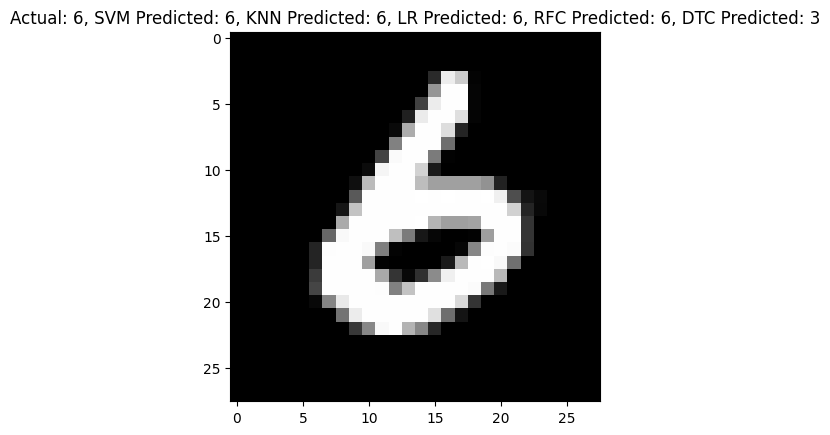

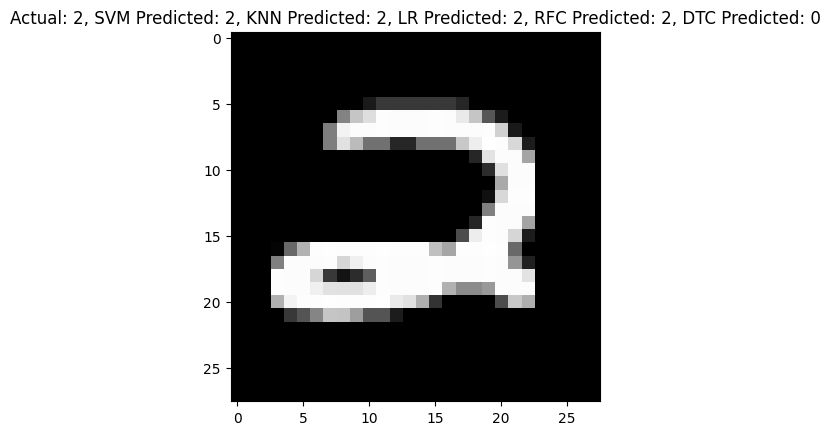

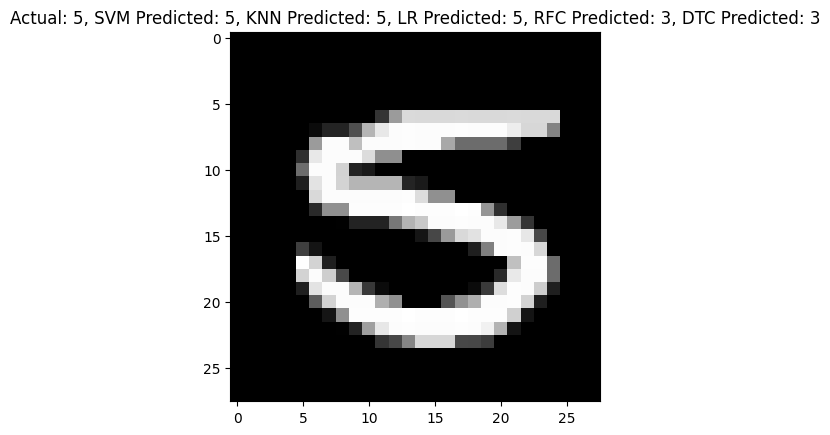

Timer:-  1.7806614999972226


In [103]:
from timeit import default_timer as timer
start = timer()
for sample_index in sample_indices_to_display:
    actual_digit = y_test[sample_index]
    svm_predicted_digit = y_pred[sample_index]
    knn_predicted_digit = y_pred1[sample_index]
    lr_predicted_digit = y_pred2[sample_index]
    rfc_predicted_digit = y_pred3[sample_index]
    dtc_predicted_digit = y_pred4[sample_index]
    
    pic = X_test[sample_index].reshape(28, 28)

    plt.figure()
    plt.imshow(pic, cmap='gray')
    plt.title(f'Actual: {actual_digit}, SVM Predicted: {svm_predicted_digit}, KNN Predicted: {knn_predicted_digit}, LR Predicted: {lr_predicted_digit}, RFC Predicted: {rfc_predicted_digit}, DTC Predicted: {dtc_predicted_digit}')
    plt.show()
print("Timer:- ", timer() - start)